### 0. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### 1. Import Dataset: Load the dataset.

In [2]:
df = pd.read_csv('victoria.csv')
df.set_index('row.labels')
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [3]:
df['conservation'] = df['conservation'].map({'1A': 'A', '2A': 'B', '2B': 'C','3A': 'C'})

In [4]:
df.head(10)

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,C,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,B,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,A,2,0,1,S4,4A,1
5,6,173000,7720999908,Z11,4B,35,4,5,E50,A,1,0,0,S4,3A,1
6,7,245000,7704000092,Z47,3A,14,6,4,E50,A,1,0,1,S3,4A,1
7,8,210000,6290000153,Z48,3B,36,3,4,E100,C,1,0,0,S3,3A,1
8,9,"188982,2",5847999954,Z11,4B,37,4,4,E25,B,1,0,0,S4,3A,1
9,10,193000,5915999985,Z11,3B,11,5,4,E50,A,1,0,0,S4,3A,1


### 2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)

In [5]:
df.shape

(218, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(8)
memory usage: 27.4+ KB


In [7]:
df['area'] = df['area'].str.replace(',', '.').astype('float64')
df['totalprice'] = df['totalprice'].str.replace(',', '').astype('float64')

In [8]:
df.describe()

,row.labels,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,2.180000e+02,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,2.885435e+05,5.718657e+09,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,1.289723e+05,3.455007e+09,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,1.550000e+05,5.300000e+01,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,2.300000e+05,1.187250e+09,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,2.700000e+05,7.118500e+09,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,3.297500e+05,8.542750e+09,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,1.889822e+06,9.992000e+09,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


In [9]:
# module Check missing value 
def missing_value(df):
    '''
    Documentation :
    --------------
    * df : Dataframe Name
    '''
    #count the number of missing value 
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent(%)'])
    
    return missing.head(20)

In [10]:
missing_value(df)

,Total_Missing,Percent(%)
tras,0,0.0
heating,0,0.0
streetcategory,0,0.0
elevator,0,0.0
garage,0,0.0
toilets,0,0.0
conservation,0,0.0
out,0,0.0
rooms,0,0.0
floor,0,0.0


### 3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.

In [11]:
#Univariat Analisys
def Univariate_plot(df, column, vartype, hue = None ):
    '''
    Documentation :
    Univariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name
    * vartype : variable type : continuos or categorical
                (0) Continuos/Numerical   : Distribution, Violin & Boxplot will be plotted.
                (1) Categorical           : Countplot will be plotted.
    * hue     : It's only applicable for categorical analysis.
    '''
    sns.set(style="darkgrid")
      
    if vartype == 0:
        fig, ax=plt.subplots(nrows = 3, ncols=1,figsize=(12,12))
        # Distribution Plot
        ax[0].set_title("Distribution Plot",fontsize = 10)
        sns.distplot(df[column], kde=False, fit=stats.gamma, color='darkblue', label = column, ax=ax[0])
        
        # Violinplot 
        ax[1].set_title("Violin Plot",fontsize = 10)
        sns.violinplot(data= df, x=column, color = 'limegreen', inner="quartile", orient='h', ax=ax[1])
        
        #Boxplot
        ax[2].set_title("Box Plot",fontsize = 10)
        sns.boxplot(data =df, x=col,color='cyan',orient="h",ax=ax[2])
        
        fig.tight_layout()
        
    if vartype == 1 :
        #Count plot 
        fig = plt.figure(figsize=(12,6))
        plt.title('Count Plot',fontsize = 20)
        ax=sns.countplot(data=df, x=column, palette="Blues_r",order = df[column].value_counts().index)
        ax.set_xlabel(column, fontsize = 15)
        ax.tick_params(labelsize=12)

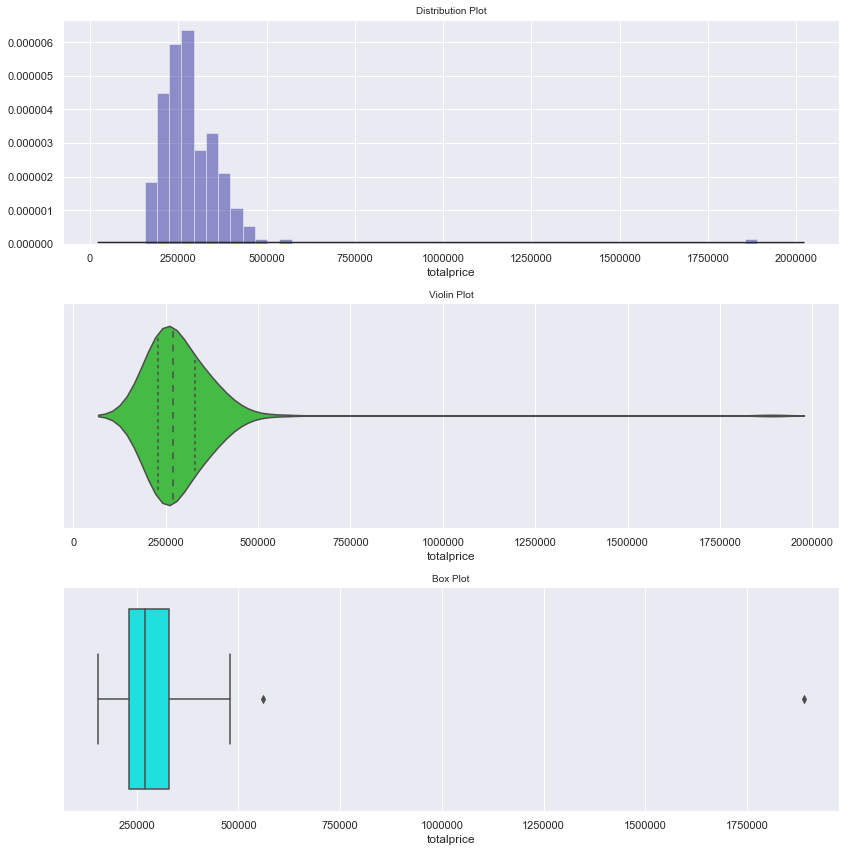

In [12]:
# 1. Define Dataframe
dataframe = df

# 2. Define feature
col = 'totalprice'

# 3. Vartype 
var_type = 0   
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type)

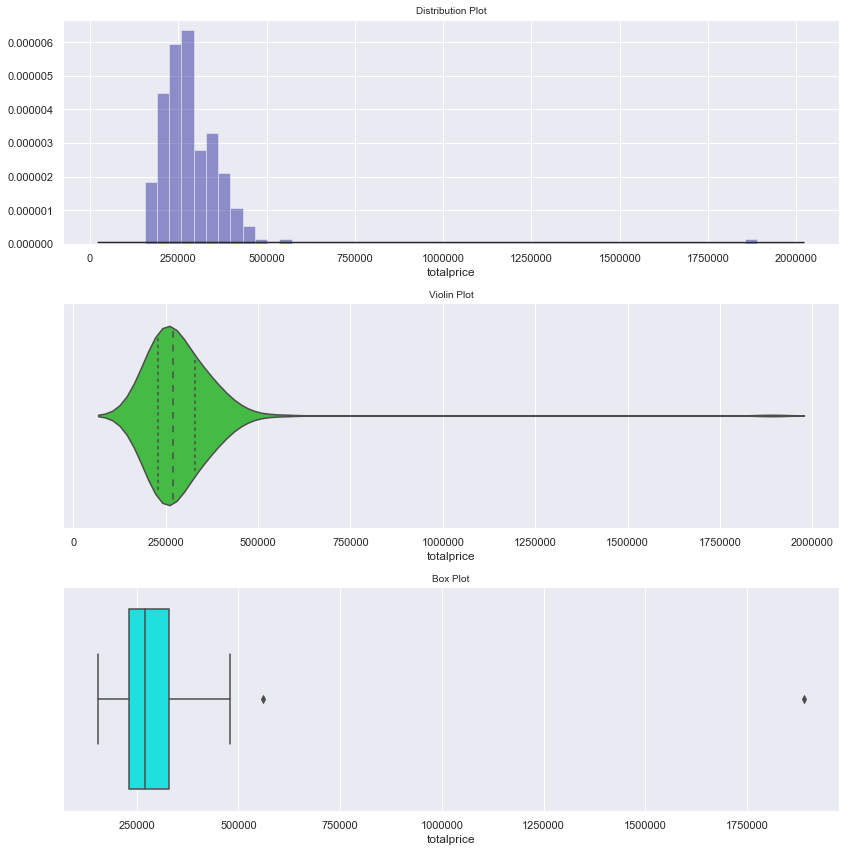

In [13]:
# 1. Define Dataframe
dataframe = df

# 2. Define feature
col = 'totalprice'

# 3. Vartype 
var_type = 0   
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type)

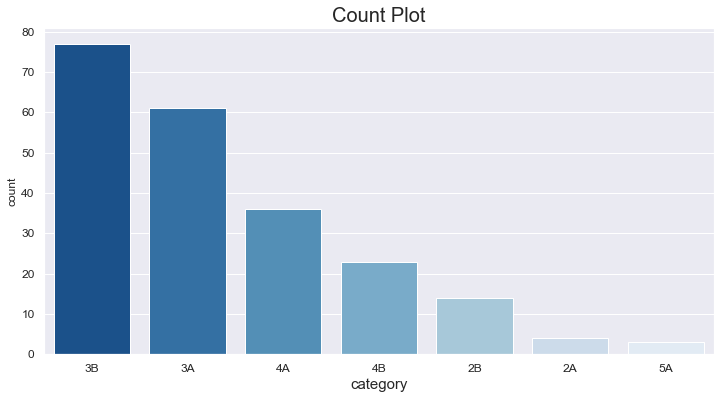

In [14]:
# 1. Define Dataframe
dataframe =df

# 2. Define feature
col = 'category'

# 3. Vartype 
var_type = 1   
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type)

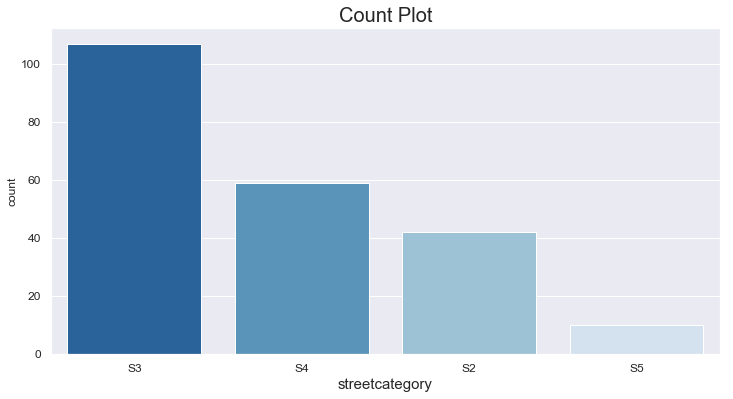

In [15]:
# 1. Define Dataframe
dataframe =df

# 2. Define feature
col = 'streetcategory'

# 3. Vartype 
var_type = 1
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type)

### 4. Variable Selection: Choose the variable and its reason.

In [16]:
def lin_regression(df, ycol = None, alpha=None):
    if alpha == None :
        alpha = 0.05 
    #determine y and x variable 
    y = df[ycol]
    x = df.drop([ycol], axis = 1)
    #build model 
    model = sm.OLS(y,x)
    #fit model OLS 
    result = model.fit()
    #get p-values
    result             = result.pvalues
    result             = pd.DataFrame(result, columns=['p_value'])
    result.index       = result.index.set_names(['features'])
    #result            = result.reset_index().rename(columns = {result.index.name : 'features'})
    result['alpha']    = alpha
    result['decision'] = np.where(result['p_value'] <= alpha, 'Correlated', 'Not Correlated')
    #result             = result['decision']
    return result

In [17]:
simple_reg = df.drop(['row.labels','zone','category','out','conservation','streetcategory','heating'], axis = 1)

In [18]:
#input data frame and target (Profit) into the function 
result = lin_regression(simple_reg, ycol = 'totalprice')
result

,p_value,alpha,decision
features,,,
area,0.500698,0.05,Not Correlated
age,0.370612,0.05,Not Correlated
floor,0.867940,0.05,Not Correlated
rooms,0.000340,0.05,Correlated
toilets,0.018973,0.05,Correlated
garage,0.114841,0.05,Not Correlated
elevator,0.880087,0.05,Not Correlated
tras,0.027722,0.05,Correlated


In [19]:
X = simple_reg.copy()
X = X[['area','age','rooms','toilets','tras','garage','floor']]
y = df.totalprice # define the target variable (dependent variable) as y

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(174, 7) (174,)
(44, 7) (44,)


In [21]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
y = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ' + format(y,'.22f'))

RMSE: 59011.0446915278007509186864
